In [ ]:

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
# Set the path to the file you'd like to load
file_path = "AIML Dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "amanalisiddiqui/fraud-detection-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/var/folders/r0/jybzwz115yn9df3wqql357_40000gn/T/ipykernel_7065/1283517108.py:15: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


 
 Type of payment: PAYMENT
-------------Money Out Analysis---------------------
Consistent balances: 872,412 (40.55%)
 
 Type of payment: TRANSFER
-------------Money Out Analysis---------------------
Consistent balances: 21,869 (4.10%)
 
 Type of payment: CASH_OUT
-------------Money Out Analysis---------------------
Consistent balances: 228,109 (10.19%)
 
 Type of payment: DEBIT
-------------Money Out Analysis---------------------
Consistent balances: 27,761 (67.00%)
 
 Type of payment: CASH_IN
-------------Money In Analysis---------------------
Consistent balances: 930,127 (66.47%)


/var/folders/r0/jybzwz115yn9df3wqql357_40000gn/T/ipykernel_7065/3888517215.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, palette='bright', alpha=.6)


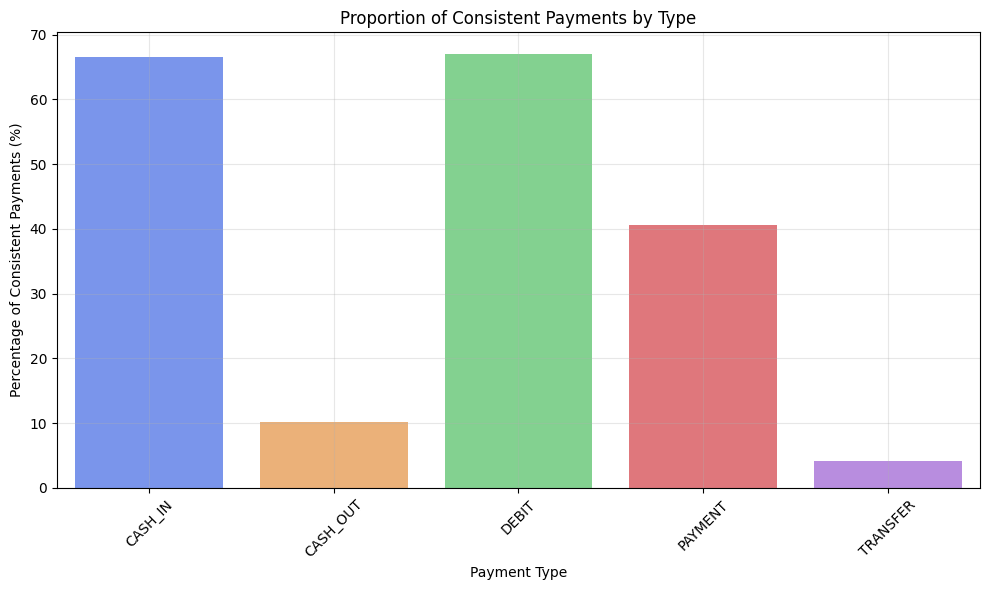


Proportions of consistent payments by type:
type
CASH_IN     66.471638
CASH_OUT    10.194816
DEBIT       67.003765
PAYMENT     40.549107
TRANSFER     4.103703
Name: is_consistent, dtype: float64


In [ ]:
for a_type in df['type'].unique():
    type_df = df[df['type']==a_type]
    consistent_money_out = type_df[type_df['oldbalanceOrg'] == type_df['newbalanceOrig'] + type_df['amount']]

    consistent_money_in = type_df[type_df['oldbalanceOrg'] == type_df['newbalanceOrig']- type_df['amount']]
    print(f" \n Type of payment: {a_type}")
    if a_type in ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT']:
        print("-------------Money Out Analysis---------------------")
        print(f"Consistent balances: {len(consistent_money_out):,} ({len(consistent_money_out)/len(type_df)*100:.2f}%)")
    elif a_type == 'CASH_IN':
        print("-------------Money In Analysis---------------------")
        print(f"Consistent balances: {len(consistent_money_in):,} ({len(consistent_money_in)/len(type_df)*100:.2f}%)")



def check_consistency(row):
    if row['type'] in ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT']:

        return row['oldbalanceOrg'] == row['newbalanceOrig'] + row['amount']
    elif row['type'] == 'CASH_IN':

        return row['oldbalanceOrg'] == row['newbalanceOrig'] - row['amount']
    else:
        return False
    
df['is_consistent'] = df.apply(check_consistency, axis=1).astype(int)

proportions = df.groupby('type')['is_consistent'].mean() * 100  

plt.figure(figsize=(10, 6))
sns.barplot(x=proportions.index, y=proportions.values, palette='bright', alpha=.6)
plt.title('Proportion of Consistent Payments by Type')
plt.xlabel('Payment Type')
plt.ylabel('Percentage of Consistent Payments (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

print("\nProportions of consistent payments by type:")
print(proportions)


/var/folders/r0/jybzwz115yn9df3wqql357_40000gn/T/ipykernel_7065/2311128295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', order=df['type'].value_counts().index, data=df, palette='bright', alpha=.7, edgecolor='black', stat='proportion')


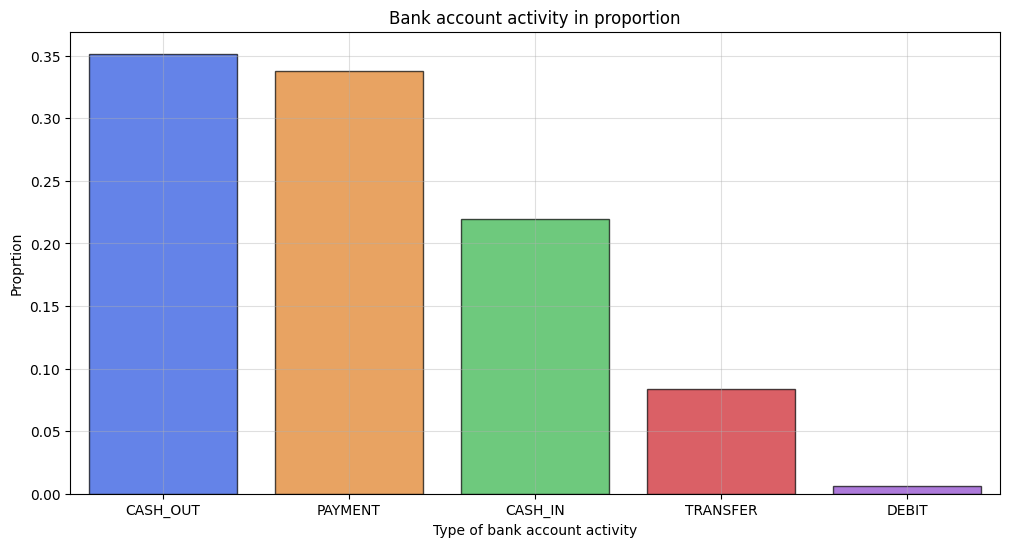

In [3]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='type', order=df['type'].value_counts().index, data=df, palette='bright', alpha=.7, edgecolor='black', stat='proportion')
plt.title("Bank account activity in proportion")
plt.ylabel("Proprtion")
plt.xlabel("Type of bank account activity")
plt.grid(alpha=.4)
plt.show()


In [4]:
rel = 0
rel = ((df['isFraud'] == 1) & (df['isFlaggedFraud'] == 1)).sum()

print(f"Percentage correctly classified: {rel/len(df[df['isFraud']==1])}")

Percentage correctly classified: 0.0019481310118105442


In [5]:
def all_money_transfered(row):
    if (row['newbalanceOrig'] == 0.0 and row['oldbalanceOrg'] != 0.0 ):
        return True
    else:
        return False

df['all_transfered']=df.apply(all_money_transfered, axis=1).astype(int)

In [6]:
type_encoder = LabelEncoder()
type_encoder.fit(df['type'])
df['type']=type_encoder.transform(df['type'])


name_orig_encoder = LabelEncoder()
name_orig_encoder.fit(df['nameOrig'])
df['nameOrig']=name_orig_encoder.transform(df['nameOrig'])



name_dest_encoder = LabelEncoder()
name_dest_encoder.fit(df['nameDest'])
df['nameDest']=name_dest_encoder.transform(df['nameDest'])

In [7]:
df[df['all_transfered']==True]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,is_consistent,all_transfered
2,1,4,181.00,1002156,181.00,0.0,439685,0.00,0.00,1,0,1,1
3,1,1,181.00,5828262,181.00,0.0,391696,21182.00,0.00,1,0,1,1
8,1,3,4024.36,869140,2671.00,0.0,768940,0.00,0.00,0,0,0,1
10,1,2,9644.94,2957937,4465.00,0.0,571261,10845.00,157982.12,0,0,0,1
13,1,3,11633.76,2355062,10127.00,0.0,2501242,0.00,0.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.0,505863,0.00,339682.13,1,0,1,1
6362616,743,4,6311409.28,1737278,6311409.28,0.0,260949,0.00,0.00,1,0,1,1
6362617,743,1,6311409.28,533958,6311409.28,0.0,108224,68488.84,6379898.11,1,0,1,1
6362618,743,4,850002.52,2252932,850002.52,0.0,319713,0.00,0.00,1,0,1,1


In [8]:
target_column = df['isFraud']
df.drop(columns= [ 'isFraud'], inplace=True)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(df, target_column, test_size=0.3)

X_val = X_test[0: np.floor((0.1 * len(X_test))).astype(int)]
X_test =  X_test[(np.floor(0.1 * len(X_test))).astype(int): len(X_test)]

Y_val = Y_test[0: np.floor(0.1 * len(Y_test)).astype(int)]
Y_test =  Y_test[(np.floor(0.1 * len(Y_test))).astype(int): len(Y_test)]


In [10]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [11]:
LR_preds= LR.predict(X_test)

In [12]:
X_test.shape, Y_test.shape

((1717908, 12), (1717908,))

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Accuracy for LogisticRegression:  {accuracy_score(Y_test,LR_preds)}")

print(f"Confusion matrix: \n {confusion_matrix(Y_test, LR_preds)}")

Accuracy for LogisticRegression:  0.9991053071526531
Confusion matrix: 
 [[1715373     234]
 [   1303     998]]


In [14]:
from lightgbm import LGBMClassifier
import optuna

def objective(trial):
    params ={
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.05),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),

    }
    model = LGBMClassifier(**params, verbose=-1)
    model.fit(X_train, Y_train)
    
    # Make predictions and calculate the metric
    y_pred = model.predict(X_val)
    ac = accuracy_score(Y_val, y_pred)
    return ac


study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective, n_trials=30)  





lgbm = LGBMClassifier(**study_lgbm.best_params, random_state=42)
lgbm.fit(X_train,Y_train)

lgbm_preds = lgbm.predict(X_test)

print(f"Accuracy LGBM: {accuracy_score(Y_test, lgbm_preds)}")
confusion_matrix(Y_test, lgbm_preds)

[I 2025-04-24 12:26:19,115] A new study created in memory with name: no-name-ecd78fc6-f3d7-4097-b3e3-aca2fda1829a
[I 2025-04-24 12:26:25,848] Trial 0 finished with value: 0.999979044206247 and parameters: {'num_leaves': 746, 'learning_rate': 0.024995347635252137, 'bagging_freq': 6, 'min_child_samples': 86, 'lambda_l1': 0.001818268709845062, 'lambda_l2': 5.624128331882569e-05}. Best is trial 0 with value: 0.999979044206247.
[I 2025-04-24 12:26:30,434] Trial 1 finished with value: 0.9999895221031234 and parameters: {'num_leaves': 729, 'learning_rate': 0.029987627741456226, 'bagging_freq': 5, 'min_child_samples': 40, 'lambda_l1': 1.1765265831241505e-06, 'lambda_l2': 0.09662888256851059}. Best is trial 1 with value: 0.9999895221031234.
[I 2025-04-24 12:26:36,743] Trial 2 finished with value: 0.9999895221031234 and parameters: {'num_leaves': 302, 'learning_rate': 0.030004035119887383, 'bagging_freq': 4, 'min_child_samples': 64, 'lambda_l1': 3.7531434006702894e-05, 'lambda_l2': 1.11788600445

Accuracy LGBM: 0.9999918505531146


array([[1715605,       2],
       [     12,    2289]])

Text(0.5, 1.0, 'Confusion matrix for LGBM predictions')

<Figure size 1200x600 with 0 Axes>

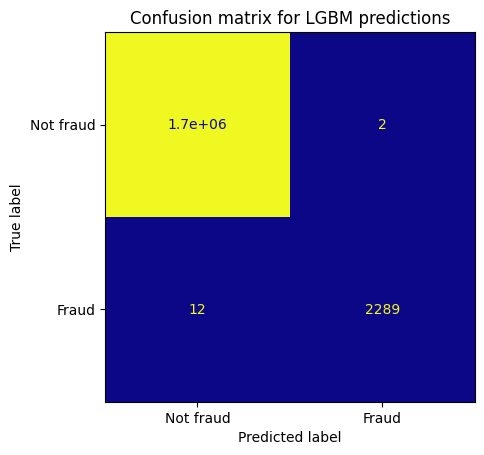

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(12,6))
ConfusionMatrixDisplay(confusion_matrix(Y_test,lgbm_preds), display_labels=['Not fraud', 'Fraud']).plot( colorbar=False, cmap="plasma")
plt.title("Confusion matrix for LGBM predictions")

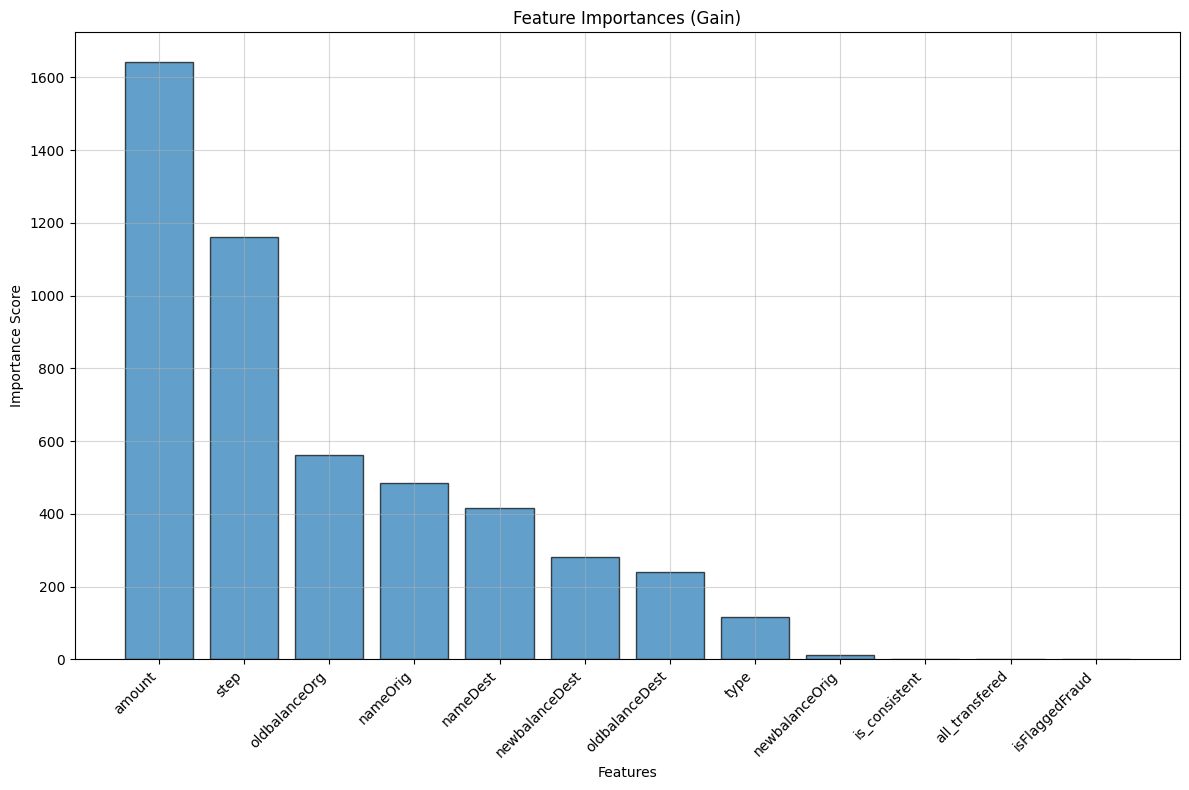

In [16]:
feature_importance_dict = dict(zip(df.columns, lgbm.feature_importances_))
sorted_features = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(12, 8))
plt.bar(range(len(sorted_features)), list(sorted_features.values()), alpha=.7, edgecolor='black')
plt.xticks(range(len(sorted_features)), list(sorted_features.keys()), rotation=45, ha='right')
plt.title('Feature Importances (Gain)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.grid(alpha=.5)
plt.tight_layout()
plt.show()
